**#Loan Repayment Dataset -Building model using Decision Tree, Random Forest,Logistic regression**

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Get the Data

In [5]:
loans=pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods**

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Text(0.5,0,'Fico')

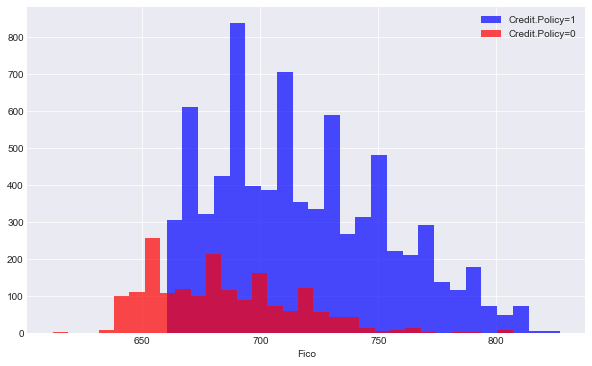

In [9]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(color='blue',bins=30,label='Credit.Policy=1',alpha=0.7)
loans[loans['credit.policy']==0]['fico'].hist(color='red',bins=30,label='Credit.Policy=0',alpha=0.7)
plt.legend()
plt.xlabel('Fico')

Text(0.5,0,'Fico')

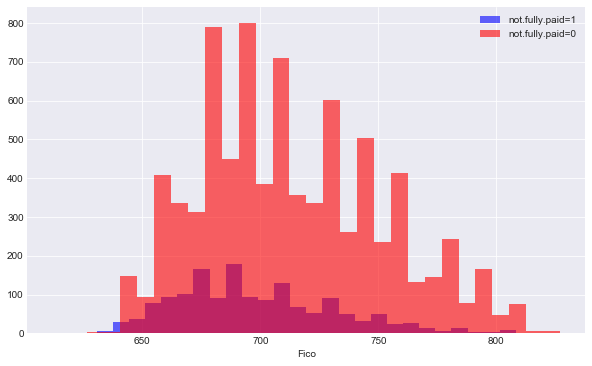

In [10]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(color='blue',bins=30,label='not.fully.paid=1',alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(color='red',bins=30,label='not.fully.paid=0',alpha=0.6)
plt.legend()
plt.xlabel('Fico')

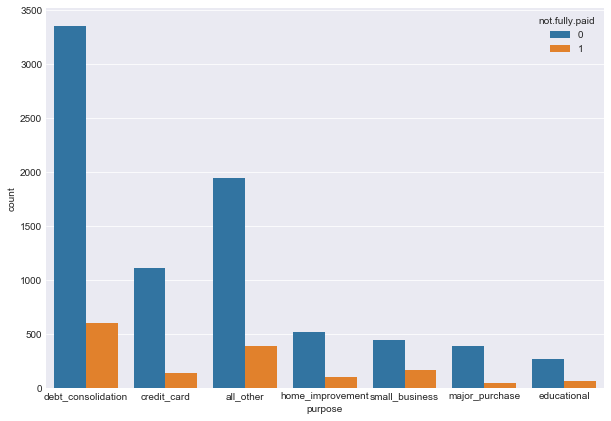

In [11]:
plt.figure(figsize=(10,7))
sns.countplot('purpose',data=loans,hue='not.fully.paid')

** Let's see the trend between FICO score and interest rate using jointplot.**

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


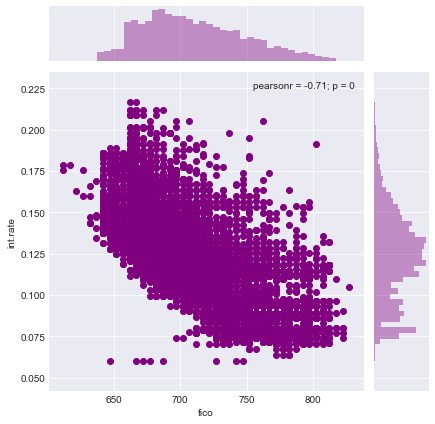

In [12]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

In [13]:
loans.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


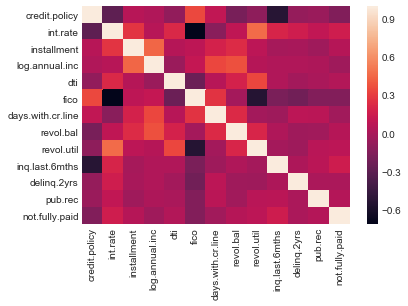

In [14]:
sns.heatmap(loans.corr())

**##Dealing withf  Categorical Features**

In [15]:
categorical_feature=['purpose']

In [16]:
final_data = pd.get_dummies(loans,columns=categorical_feature,drop_first=True)

In [17]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Building Decision tree Model -Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.82      0.83      2431
          1       0.19      0.24      0.21       443

avg / total       0.75      0.73      0.74      2874



In [26]:
print(confusion_matrix(y_test,predictions))

[[1983  448]
 [ 338  105]]


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, predictions)

0.7265135699373695

## Training the Random Forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=600)

In [31]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

In [33]:
predictions = rfc.predict(X_test)

**Classification report from the results**

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.59      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874



**Confusion Matrix for the predictions.**

In [36]:
print(confusion_matrix(y_test,predictions))

[[2424    7]
 [ 433   10]]


## Training the Logistic regression model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.50      0.01      0.02       443

avg / total       0.79      0.85      0.78      2874



In [43]:
accuracy_score(y_test, predictions)

0.8458594293667363

In [44]:
print(confusion_matrix(y_test,predictions))

[[2426    5]
 [ 438    5]]
